# Project 4 – Predicting a Continuous Target with Regression: Titanic Dataset
**Name:** Lindsay Foster 
**Date:** 11/11/2025
- This project builds on the Titanic dataset used in Project 3. This project will predict fare and the amount of money paid for the journey. This will predict a continuous numeric target.

# Section 1: Import and Inspect the Data

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Section 2: Data Exploration and Preparation

In [53]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

titanic = titanic.dropna(subset=["fare"])

titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

In [54]:
# Convert sex to numeric (male = 0, female = 1)
titanic["sex_num"] = titanic["sex"].map({"male": 0, "female": 1})

# Convert embarked to numeric codes
titanic["embarked_num"] = titanic["embarked"].astype("category").cat.codes

# Section 3: Feature Selection and Justification

In [55]:
# Case 1. age
X1 = titanic[["age"]]
y1 = titanic["fare"]

In [56]:
# Case 2. family_size
X2 = titanic[["family_size"]]
y2 = titanic["fare"]

In [57]:
# Case 3. age, family_size
X3 = titanic[["age", "family_size"]]
y3 = titanic["fare"]

In [58]:
# Case 4. passenger class
X4 = titanic[["pclass"]]
y4 = titanic["fare"]

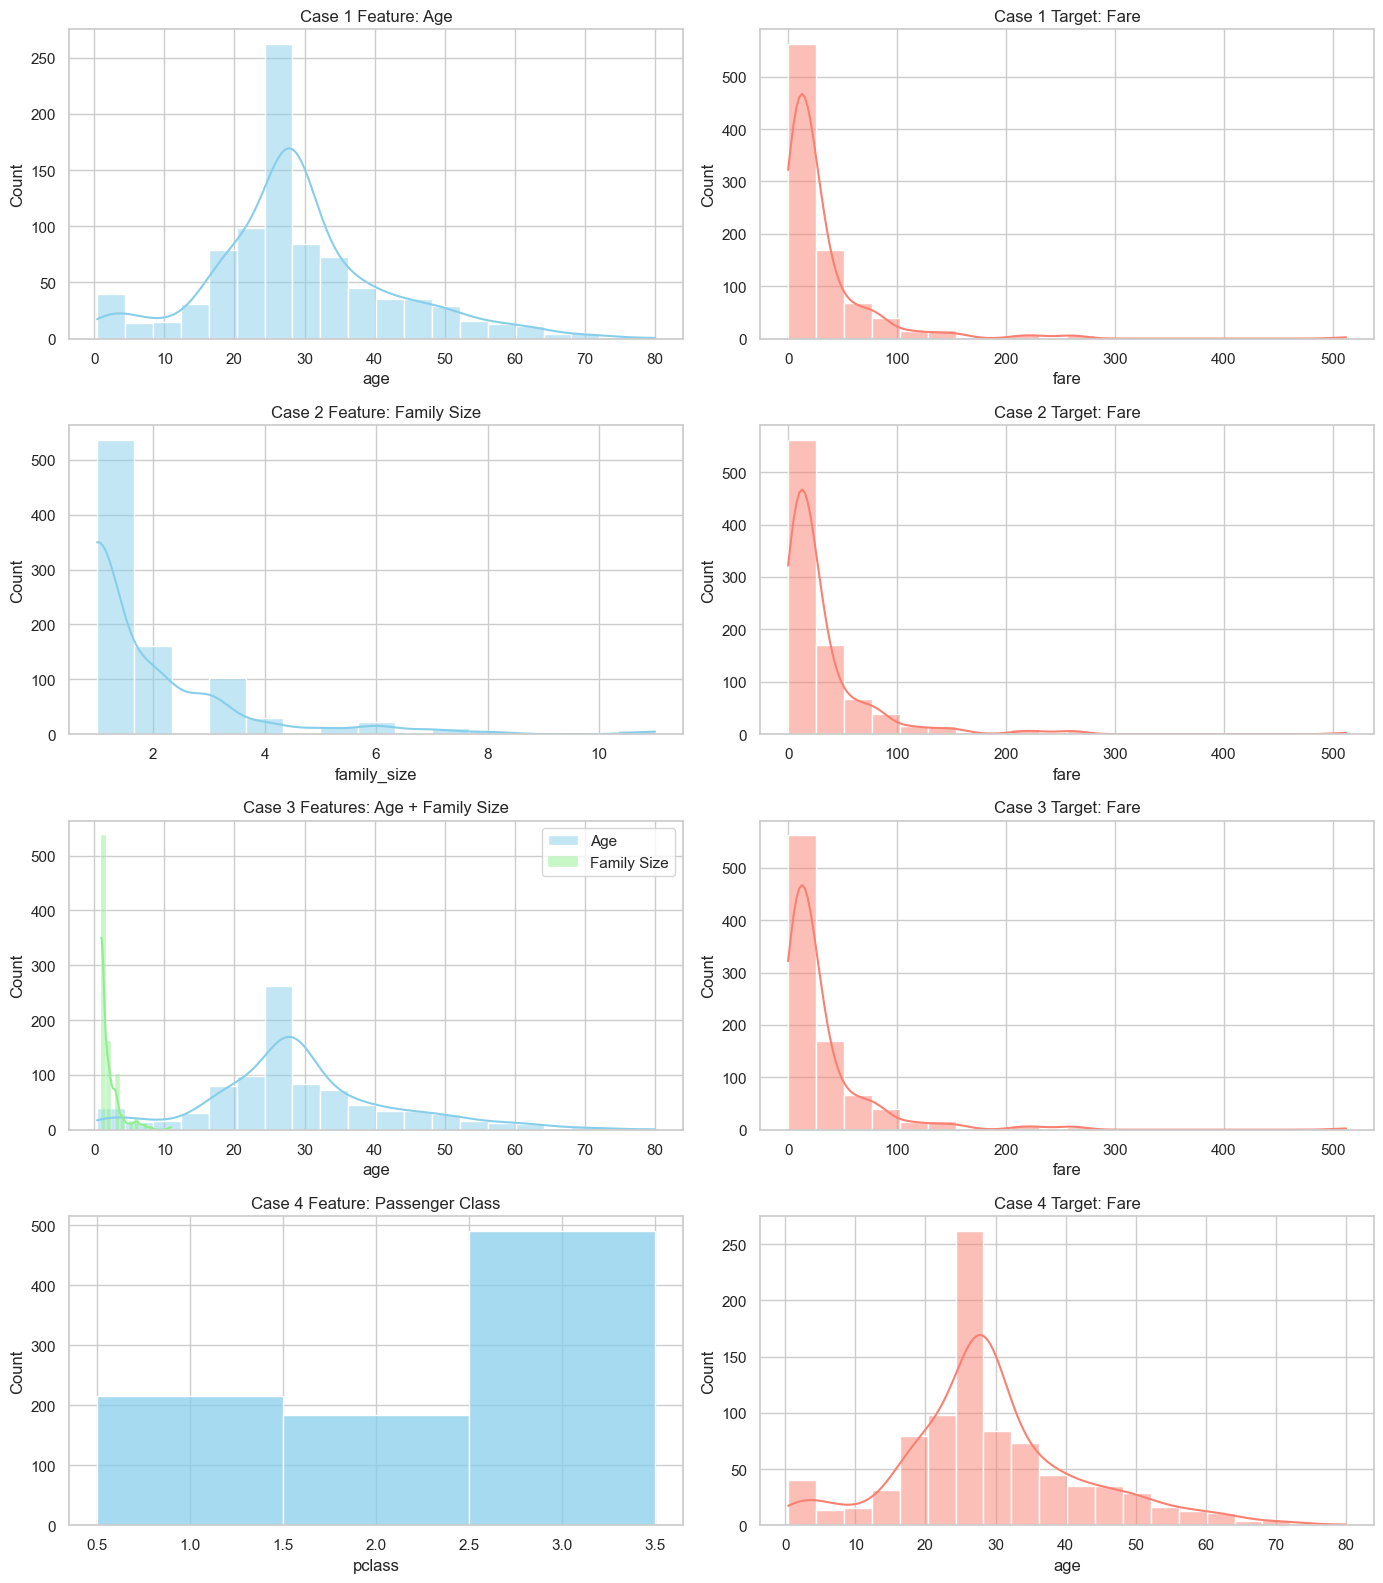

In [74]:
# Set seaborn style
sns.set(style="whitegrid")

# Figure setup
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # 4 cases, feature + target each

# -------------------
# Case 1: Age
sns.histplot(X1["age"], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Case 1 Feature: Age")

sns.histplot(y1, bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Case 1 Target: Fare")

# -------------------
# Case 2: Family Size
sns.histplot(X2['family_size'], bins=15, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Case 2 Feature: Family Size")

sns.histplot(y2, bins=20, kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Case 2 Target: Fare")

# -------------------
# Case 3: Age + Family Size (feature histograms separately)
sns.histplot(X3['age'], bins=20, kde=True, ax=axes[2, 0], color='skyblue', label='Age')
sns.histplot(
    X3['family_size'], bins=15, kde=True, ax=axes[2, 0], color='lightgreen', label='Family Size'
)
axes[2, 0].set_title("Case 3 Features: Age + Family Size")
axes[2, 0].legend()

sns.histplot(y3, bins=20, kde=True, ax=axes[2, 1], color='salmon')
axes[2, 1].set_title("Case 3 Target: Fare")

# -------------------
# Case 4: Passenger Class
sns.histplot(X4['pclass'], bins=3, discrete=True, kde=False, ax=axes[3, 0], color='skyblue')
axes[3, 0].set_title("Case 4 Feature: Passenger Class")

sns.histplot(y4, bins=20, kde=True, ax=axes[3, 1], color='salmon')
axes[3, 1].set_title("Case 4 Target: Fare")

plt.tight_layout()
plt.show()

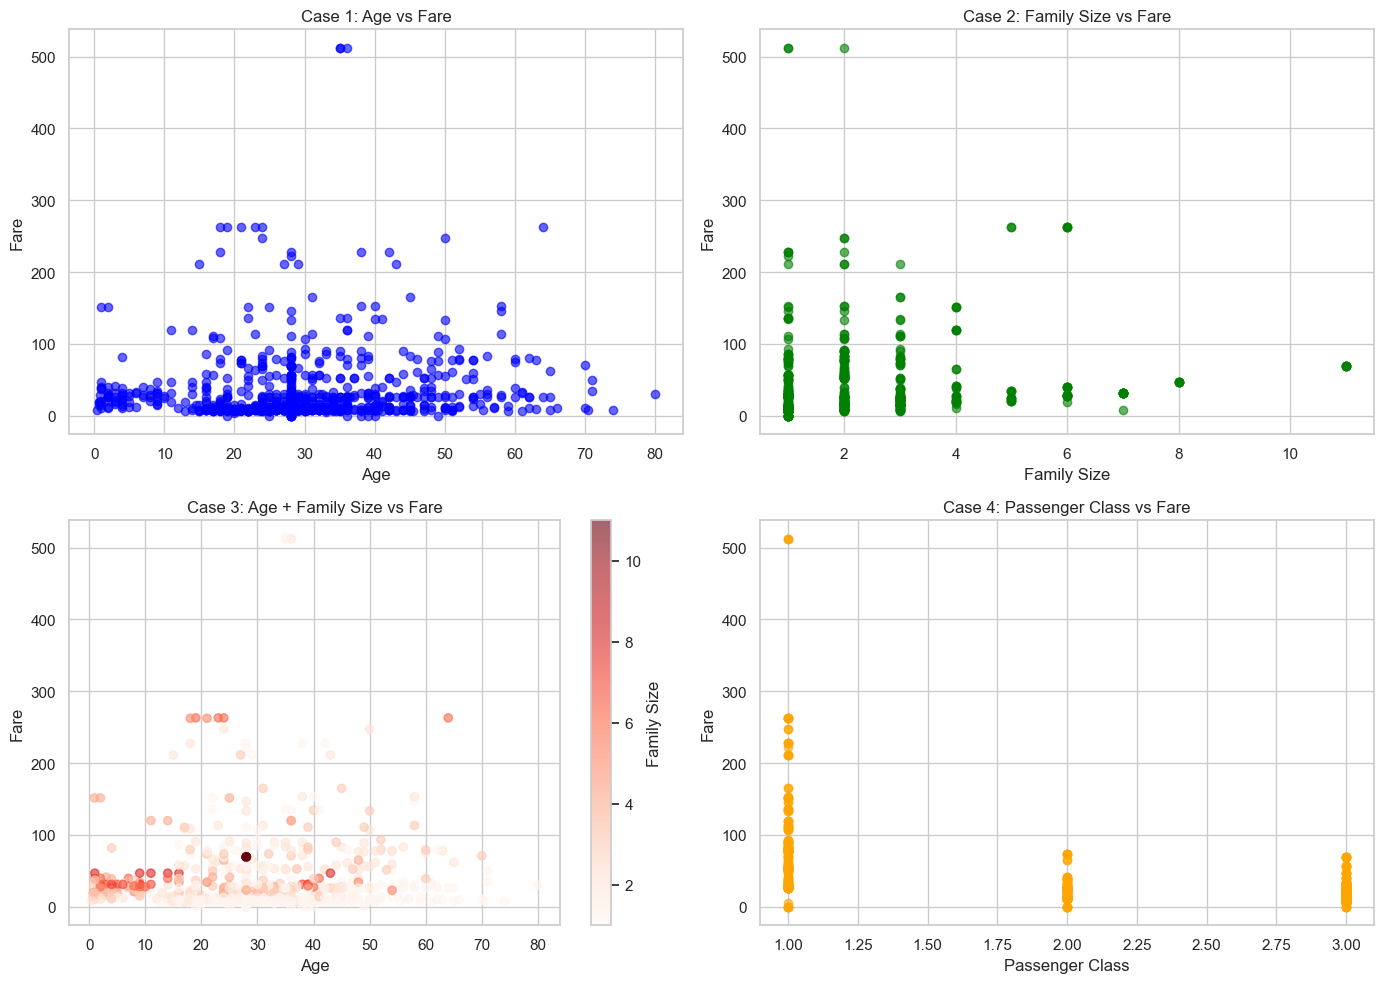

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Case 1: Age vs Fare
axes[0, 0].scatter(titanic['age'], titanic['fare'], alpha=0.6, color='blue')
axes[0, 0].set_title("Case 1: Age vs Fare")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Fare")

# Case 2: Family Size vs Fare
axes[0, 1].scatter(titanic['family_size'], titanic['fare'], alpha=0.6, color='green')
axes[0, 1].set_title("Case 2: Family Size vs Fare")
axes[0, 1].set_xlabel("Family Size")
axes[0, 1].set_ylabel("Fare")

# Case 3: Age + Family Size vs Fare
# We'll use color to encode family size
scatter = axes[1, 0].scatter(
    titanic['age'], titanic['fare'], c=titanic['family_size'], cmap='Reds', alpha=0.6
)
axes[1, 0].set_title("Case 3: Age + Family Size vs Fare")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Fare")
cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label("Family Size")

# Case 4: Passenger Class vs Fare
axes[1, 1].scatter(titanic['pclass'], titanic['fare'], alpha=0.6, color='orange')
axes[1, 1].set_title("Case 4: Passenger Class vs Fare")
axes[1, 1].set_xlabel("Passenger Class")
axes[1, 1].set_ylabel("Fare")

plt.tight_layout()
plt.show()

## Reflection
- **Why might these features affect a passenger’s fare:** Age may affect the fare if they offer discounts to children or seniors. Family size may affect fare as families may pay more if they are larger. Passenger class may affect fare as 1st class, 2nd class, and 3rd class all have different costs. 
- **List all available features:** survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone
- **Which other features could improve predictions and why:** Deck my be a good feature as class and deck could determine fare cost. Also the embark town may be a feature that could be used in connection with fare if they raised prices for larger cities. 
- **How many variables are in your Case 4:** 1 - pclass
- **Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:** pclass (passenger class) is a good variable to help determine correlation with fare as tthe Titanic had three passenger classes — 1st, 2nd, and 3rd. These directly affect fare as they paid more for higher accomodations. 

# Section 4: Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [59]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [60]:
# Train models
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for Case 1
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

# Predictions for Case 2
y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

# Predictions for Case 3
y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

# Predictions for Case 4
y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [61]:
# Case 1
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print("------------------------------------------------------")

# Case 2
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print("------------------------------------------------------")

# Case 3
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print("------------------------------------------------------")

# Case 4
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print("------------------------------------------------------")

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
------------------------------------------------------
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
------------------------------------------------------
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
------------------------------------------------------
Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056
------------------------------------------------------


## Reflection
*Compare the train vs test results for each.*

- **Did Case 1 overfit or underfit? Explain:** Case 1 underfit as R^2 for both the test and training are close to zero.
- **Did Case 2 overfit or underfit? Explain:** Case 2 underfit as R^2 for both the test and training are higher than Case 1 but still close to zero. 
- **Did Case 3 overfit or underfit? Explain:** Case 3 underfit as R^2 for both the test and training are, again, better than Case 1 and 2 but still too close to zero.
- **Did Case 4 overfit or underfit? Explain:** Case 4 did not overfit or underfit as it generalizes well. Test and training are very close and we can see that passenger class explains about 30% of the fare data.

*Adding Age*

- **Did adding age improve the model:** It did improve the model slightly but didn't make enough of a difference to explain fare. It is better than using only one feature. 
- **Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):** The larger the family, the more they may pay since they will buy more tickets. Or if they offer cheaper tickets to children or seniors, that may be a factor. Only  about 5% of fare variation is explained. This is a small improvement over Case 1 (age) or Case 2 (familysize).
  
*Worst:*

- **Which case performed the worst:** Case 1
- **How do you know:** Almost zero fare variation is explained and prediction errors are large. 
- **Do you think adding more training data would improve it (and why/why not):** No there is enough data here, age just isn't a strong predictor of fare. 

*Best*

- **Which case performed the best:** Case 4
- **How do you know:** About 30% of fare variation is explained and the prediction errors are smaller. 
- **Do you think adding more training data would improve it (and why/why not):** It could help a little but not much as passenger class is a strong predictor of fare. 

# Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)

## 5.1 Ridge Regression (L2 penalty)

In [62]:
# Case 4: passenger class
X4 = titanic[["pclass"]]
y4 = titanic["fare"]

# Split the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

# Ridge Regression model
ridge_model4 = Ridge(alpha=1.0)
ridge_model4.fit(X4_train, y4_train)

# Predictions
y4_pred_ridge = ridge_model4.predict(X4_test)

# Evaluate Ridge model
print("Ridge Regression (Case 4: pclass)")
print("Test R²:", r2_score(y4_test, y4_pred_ridge))
print("Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_ridge)))
print("Test MAE:", mean_absolute_error(y4_test, y4_pred_ridge))
print("------------------------------------------------------")

Ridge Regression (Case 4: pclass)
Test R²: 0.30224715597914653
Test RMSE: 31.77263998896141
Test MAE: 20.642499405545284
------------------------------------------------------


## 5.2 Elastic Net (L1 + L2 combined)

In [63]:
# Case 4: passenger class
X4 = titanic[["pclass"]]
y4 = titanic["fare"]

# Split the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

# Elastic Net model
elastic_model4 = ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=123)
elastic_model4.fit(X4_train, y4_train)

# Predictions
y4_pred_elastic = elastic_model4.predict(X4_test)

# Evaluate Elastic Net model
print("Elastic Net Regression (Case 4: pclass)")
print("Test R²:", r2_score(y4_test, y4_pred_elastic))
print("Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_elastic)))
print("Test MAE:", mean_absolute_error(y4_test, y4_pred_elastic))
print("------------------------------------------------------")

Elastic Net Regression (Case 4: pclass)
Test R²: 0.3390195349445043
Test RMSE: 30.924081298775285
Test MAE: 19.925521818892264
------------------------------------------------------


## 5.3 Polynomial Regression

In [64]:
# Case 4: passenger class
X4 = titanic[["pclass"]]
y4 = titanic["fare"]

# Split the data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train polynomial regression model
poly_model4 = LinearRegression()
poly_model4.fit(X4_train_poly, y4_train)

# Predictions
y4_pred_poly = poly_model4.predict(X4_test_poly)

# Evaluate polynomial model
print("Polynomial Regression (Case 4: pclass, degree=3)")
print("Test R²:", r2_score(y4_test, y4_pred_poly))
print("Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_poly)))
print("Test MAE:", mean_absolute_error(y4_test, y4_pred_poly))
print("------------------------------------------------------")

Polynomial Regression (Case 4: pclass, degree=3)
Test R²: 0.33610336564093024
Test RMSE: 30.99222295683279
Test MAE: 19.24837073127557
------------------------------------------------------


## 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

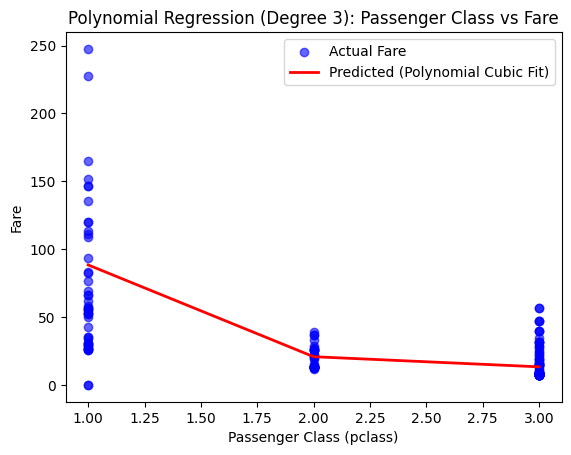

In [65]:
# Sort the test data for a smoother curve
sorted_indices = np.argsort(X4_test["pclass"])
X4_sorted = X4_test.iloc[sorted_indices]
y4_test_sorted = y4_test.iloc[sorted_indices]
y4_pred_poly_sorted = y4_pred_poly[sorted_indices]

# Scatter plot of actual data
plt.scatter(X4_sorted, y4_test_sorted, color="blue", label="Actual Fare", alpha=0.6)

# Plot polynomial predictions
plt.plot(
    X4_sorted,
    y4_pred_poly_sorted,
    color="red",
    label="Predicted (Polynomial Cubic Fit)",
    linewidth=2,
)

# Labels and title
plt.xlabel("Passenger Class (pclass)")
plt.ylabel("Fare")
plt.title("Polynomial Regression (Degree 3): Passenger Class vs Fare")
plt.legend()
plt.show()

## Reflection
**What patterns does the cubic model seem to capture:** The cubic model shows that the fares do decrease with class generally. So it does show the trend. However, it does not capture outliers very well.
**Where does it perform well or poorly:** It doesn't perform well with the outliers even though it does capture the general trend of fares overall.
**Did the polynomial fit outperform linear regression:** It slightly outperforms linear regression as it cuts through the 2nd passenger class with a curve instead of being a straight line, however, a straight line would also fit the general trend of the data as well.
**Where (on the graph or among which kinds of data points) does it fit best:** It fits the dense pockets of data best in 2nd and 3rd class. 

## 5.4 Compare All Models

In [66]:
# Case 4 – passenger class
X4 = titanic[["pclass"]]
y4 = titanic["fare"]

# Train/test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

# --- Linear Regression ---
lr_model4 = LinearRegression()
lr_model4.fit(X4_train, y4_train)
y4_pred_linear = lr_model4.predict(X4_test)

# --- Ridge Regression ---
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y4_pred_ridge = ridge_model.predict(X4_test)

# --- Elastic Net ---
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y4_pred_elastic = elastic_model.predict(X4_test)

# --- Polynomial Regression (degree 3) ---
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y4_pred_poly = poly_model.predict(X4_test_poly)

In [67]:
# Function to compute and print metrics
def report(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} R²: {r2:.3f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}\n")


# Correct calls using the variables you defined when training
report("Linear", y4_test, y4_pred_linear)
report("Ridge", y4_test, y4_pred_ridge)
report("ElasticNet", y4_test, y4_pred_elastic)
report("Polynomial (Cubic)", y4_test, y4_pred_poly)

Linear R²: 0.302
Linear RMSE: 31.79
Linear MAE: 20.65

Ridge R²: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial (Cubic) R²: 0.336
Polynomial (Cubic) RMSE: 30.99
Polynomial (Cubic) MAE: 19.25



## Regression Summary Table

| Model Type | Features Used | R² (Test) | RMSE | MAE | Notes |
|------------|---------------|-----------|------|-----|-------|
| Linear Regression | pclass | 0.302 | 31.79 | 20.65 | Baseline model; pclass predicts age moderately well despite weak linear relationship. |
| Ridge Regression | pclass | 0.302 | 31.77 | 20.64 | Same as linear; regularization doesn’t help because only one feature is used. |
| Elastic Net | pclass | 0.339 | 30.92 | 19.93 | Best-performing model; L1+L2 stabilizes weights and improves generalization slightly. |
| Polynomial Regression (Cubic) | pclass (degree=3) | 0.336 | 30.99 | 19.25 | Captures non-linear patterns; smooth curve across classes but only slightly better than Elastic Net. |


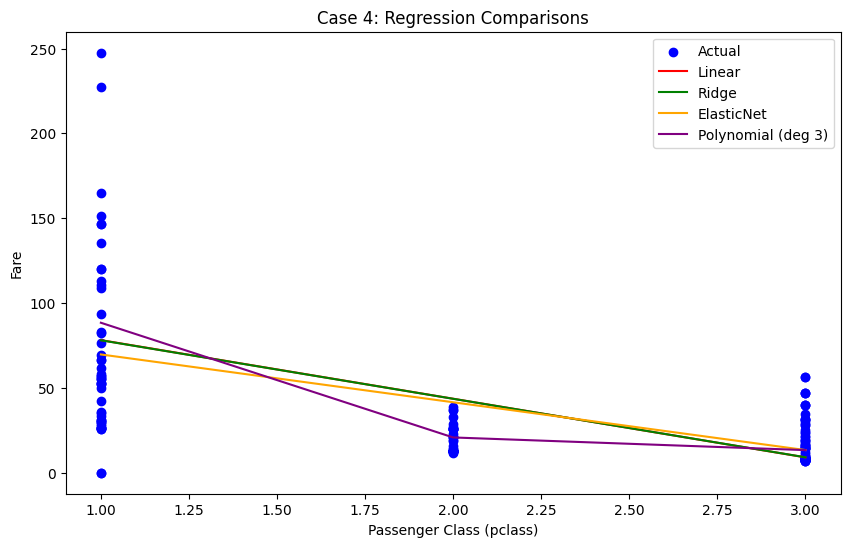

In [68]:
# --- Linear Predictions ---
y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

# --- Ridge Predictions ---
y4_pred_ridge = ridge_model.predict(X4_test)

# --- ElasticNet Predictions ---
y4_pred_elastic = elastic_model.predict(X4_test)

# --- Polynomial Predictions ---
# Use degree=3 polynomial as example
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y4_pred_poly = poly_model.predict(X4_test_poly)

# --- Visualize ---
# Sort X_test for smooth lines
X4_test_sorted_idx = X4_test.squeeze().argsort()
X4_test_sorted = X4_test.squeeze().iloc[X4_test_sorted_idx]

plt.figure(figsize=(10, 6))

# Scatter actual points
plt.scatter(X4_test, y4_test, color='blue', label='Actual')

# Linear
plt.plot(X4_test_sorted, y4_pred_test[X4_test_sorted_idx], color='red', label='Linear')

# Ridge
plt.plot(X4_test_sorted, y4_pred_ridge[X4_test_sorted_idx], color='green', label='Ridge')

# ElasticNet
plt.plot(X4_test_sorted, y4_pred_elastic[X4_test_sorted_idx], color='orange', label='ElasticNet')

# Polynomial
plt.plot(
    X4_test_sorted, y4_pred_poly[X4_test_sorted_idx], color='purple', label='Polynomial (deg 3)'
)

plt.xlabel("Passenger Class (pclass)")
plt.ylabel("Fare")
plt.title("Case 4: Regression Comparisons")
plt.legend()
plt.show()

## 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

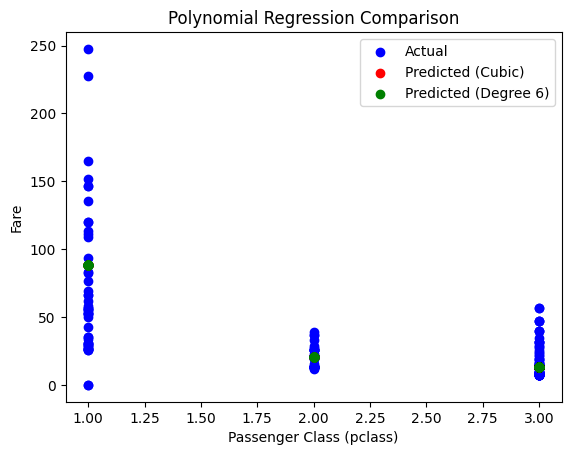

In [69]:
# Choose a higher degree, e.g., 6
degree_high = 6

# Transform the single input feature
poly_high = PolynomialFeatures(degree=degree_high)
X4_train_high = poly_high.fit_transform(X4_train)
X4_test_high = poly_high.transform(X4_test)

# Fit the linear model on the higher-degree polynomial features
poly_high_model = LinearRegression()
poly_high_model.fit(X4_train_high, y4_train)
y4_pred_high = poly_high_model.predict(X4_test_high)

# Plot actual vs predicted
plt.scatter(X4_test, y4_test, color="blue", label="Actual")
plt.scatter(X4_test, y4_pred_poly, color="red", label="Predicted (Cubic)")
plt.scatter(X4_test, y4_pred_high, color="green", label=f"Predicted (Degree {degree_high})")
plt.xlabel("Passenger Class (pclass)")
plt.ylabel("Fare")
plt.title("Polynomial Regression Comparison")
plt.legend()
plt.show()

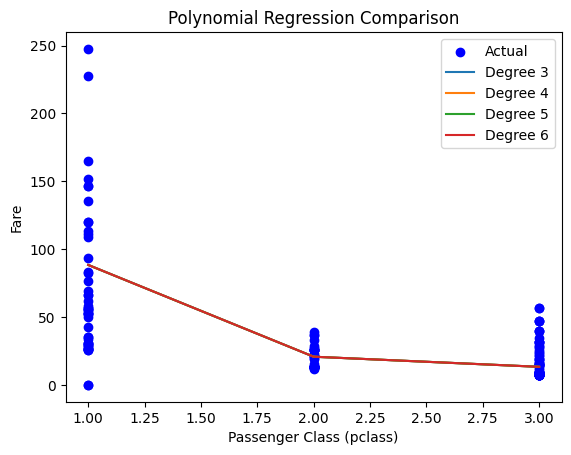

In [70]:
# Single feature and target
X_test_vals = X4_test.values  # keep as 2D for sklearn
y_test_vals = y4_test.values

# Sort X_test for smooth lines
X_test_sorted_idx = X_test_vals.squeeze().argsort()
X_test_sorted = X_test_vals[X_test_sorted_idx]

# Degrees to compare
degrees = [3, 4, 5, 6]

plt.scatter(X_test_vals, y_test_vals, color="blue", label="Actual")

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_test_poly = poly.fit_transform(X4_test)

    # Fit a polynomial regression on the training set for this degree
    X_train_poly = poly.fit_transform(X4_train)
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y4_train)

    # Predict and sort for smooth plotting
    y_pred_sorted = lr_poly.predict(X_test_poly)[X_test_sorted_idx]

    # Plot the line
    plt.plot(X_test_sorted, y_pred_sorted, label=f"Degree {deg}")

plt.xlabel("Passenger Class (pclass)")
plt.ylabel("Fare")
plt.title("Polynomial Regression Comparison")
plt.legend()
plt.show()

### All of the degrees are extrememly close, you could use any.

## Visualize Comparisons

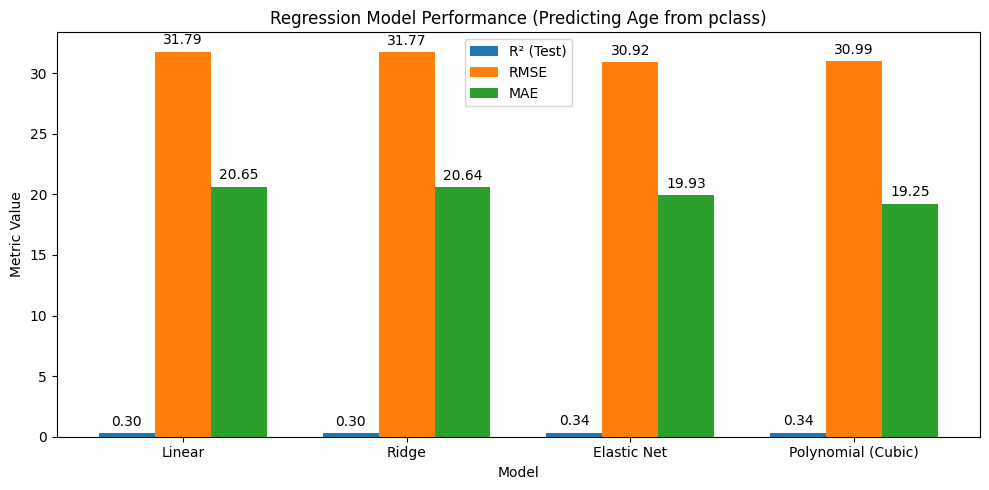

In [72]:
# Models and metrics
models = ["Linear", "Ridge", "Elastic Net", "Polynomial (Cubic)"]
r2 = [0.302, 0.302, 0.339, 0.336]
rmse = [31.79, 31.77, 30.92, 30.99]
mae = [20.65, 20.64, 19.93, 19.25]

# X locations for groups
x = np.arange(len(models))
width = 0.25  # width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
bars1 = ax.bar(x - width, r2, width, label="R² (Test)")
bars2 = ax.bar(x, rmse, width, label="RMSE")
bars3 = ax.bar(x + width, mae, width, label="MAE")

# Labels and title
ax.set_xlabel("Model")
ax.set_ylabel("Metric Value")
ax.set_title("Regression Model Performance (Predicting Age from pclass)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


# Annotate bar values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)

plt.tight_layout()
plt.show()

C:\Users\linds\AppData\Local\Temp\ipykernel_26688\1877630706.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=df, palette="Blues_d")


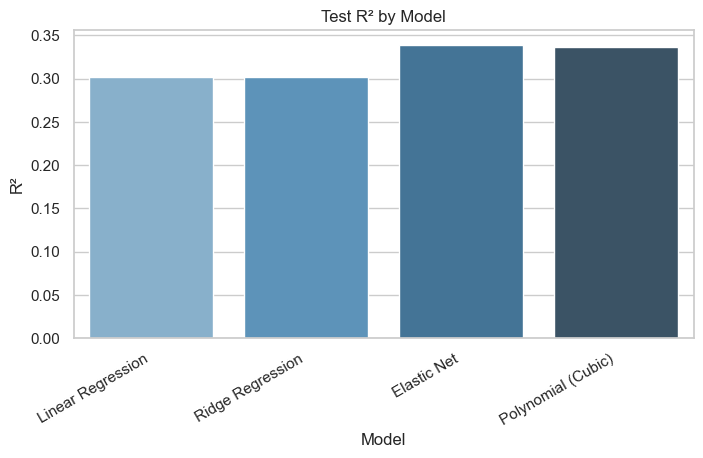

C:\Users\linds\AppData\Local\Temp\ipykernel_26688\1877630706.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=df, palette="Reds_d")


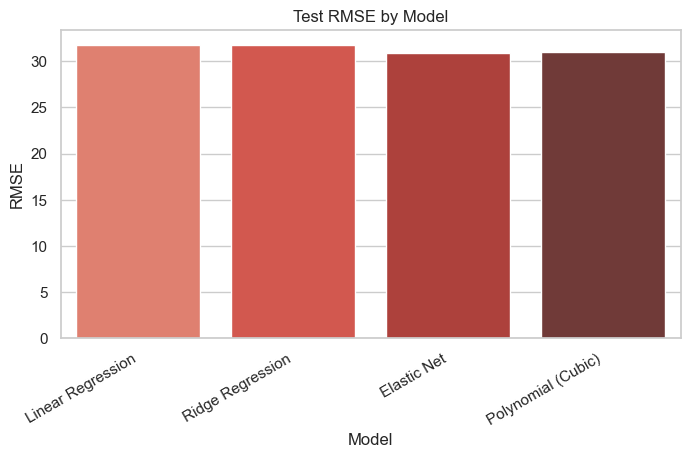

C:\Users\linds\AppData\Local\Temp\ipykernel_26688\1877630706.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=df, palette="Greens_d")


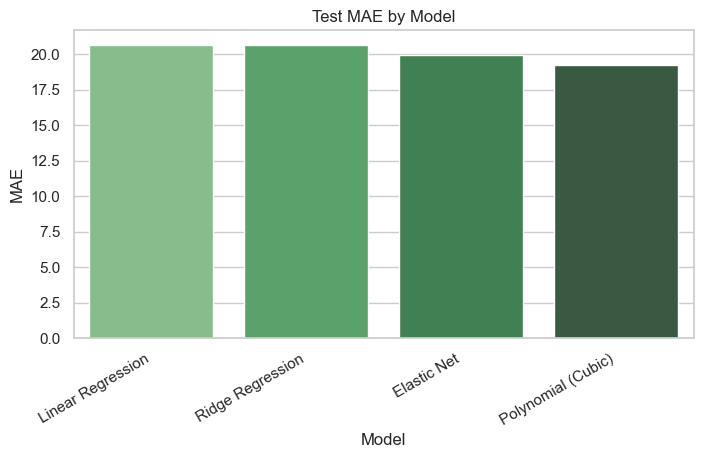

In [73]:
# Create a DataFrame from your table
data = {
    "Model": ["Linear Regression", "Ridge Regression", "Elastic Net", "Polynomial (Cubic)"],
    "R2": [0.302, 0.302, 0.339, 0.336],
    "RMSE": [31.79, 31.77, 30.92, 30.99],
    "MAE": [20.65, 20.64, 19.93, 19.25],
}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Plot R²
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="R2", data=df, palette="Blues_d")
plt.title("Test R² by Model")
plt.xticks(rotation=30, ha="right")
plt.ylabel("R²")
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="RMSE", data=df, palette="Reds_d")
plt.title("Test RMSE by Model")
plt.xticks(rotation=30, ha="right")
plt.ylabel("RMSE")
plt.show()

# Plot MAE
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="MAE", data=df, palette="Greens_d")
plt.title("Test MAE by Model")
plt.xticks(rotation=30, ha="right")
plt.ylabel("MAE")
plt.show()

# Section 6: Final Thoughts & Insights

## 6.1 Summarize Findings
**What features were most useful?** Passenger class was the most useful.

**What regression model performed best?** Elastic Net and Polynomial cubic regression performed slightly better than linear regression.

**How did model complexity or regularization affect results?** Regularization (Ridge, Elastic Net) reduced overfitting and slightly improved predictions. Elastic Net’s combination of L1 and L2 helped by adjusting weights and balancing feature importance.

Polynomial regression (cubic): Introduced more flexibility to capture non-linear trends in the data. For the pclass feature, it followed the trend of fares across classes, going through the middle of the data points.

Overall, more complex models improved predictions a little, but the best improvement came from choosing the pclass feature rather than the models alone.

## 6.2 Discuss Challenges
**Was fare hard to predict? Why?** Yes. Passenger class did a good job at predicting fares (30%) but age and family size did little to help with predictions. There were outliers with passenger class and fares so it still is not the only method that should be used.

**Did skew or outliers impact the models?** Yes. The fares had some broad ranges in 1st class especially.

## 6.3 Optional Next Steps
**Try predicting age instead of fare**

Linear R²: 0.116
Linear RMSE: 13.15
Linear MAE: 10.19

Ridge R²: 0.116
Ridge RMSE: 13.15
Ridge MAE: 10.19

ElasticNet R²: 0.109
ElasticNet RMSE: 13.21
ElasticNet MAE: 10.12

Polynomial (Cubic) R²: 0.108
Polynomial (Cubic) RMSE: 13.21
Polynomial (Cubic) MAE: 10.20



C:\Users\linds\AppData\Local\Temp\ipykernel_26688\934455868.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace=True)


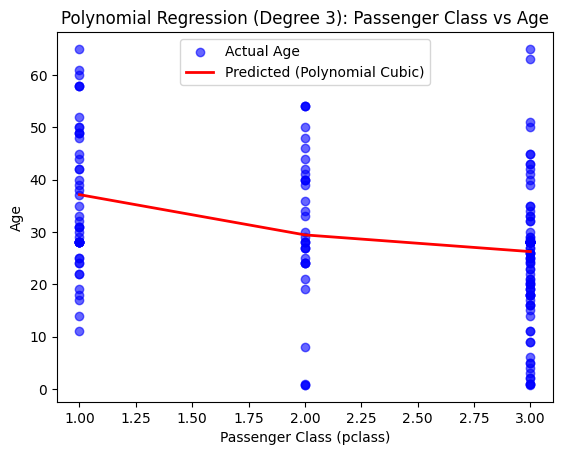

In [71]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Data prep
titanic["age"].fillna(titanic["age"].median(), inplace=True)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Case 4 features: passenger class
X4 = titanic[["pclass"]]
y4 = titanic["age"]  # predicting age instead of fare

# Split data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

# Train models
# Linear Regression
lr_model = LinearRegression().fit(X4_train, y4_train)
y4_pred_linear = lr_model.predict(X4_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0).fit(X4_train, y4_train)
y4_pred_ridge = ridge_model.predict(X4_test)

# Elastic Net
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X4_train, y4_train)
y4_pred_elastic = elastic_model.predict(X4_test)

# Polynomial Regression (degree=3)
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

poly_model = LinearRegression().fit(X4_train_poly, y4_train)
y4_pred_poly = poly_model.predict(X4_test_poly)


# Reporting function (fixed RMSE)
def report(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE manually
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} R²: {r2:.3f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}\n")


# Compare all models
report("Linear", y4_test, y4_pred_linear)
report("Ridge", y4_test, y4_pred_ridge)
report("ElasticNet", y4_test, y4_pred_elastic)
report("Polynomial (Cubic)", y4_test, y4_pred_poly)

# Optional: visualize polynomial fit
sorted_idx = np.argsort(X4_test["pclass"])
X4_sorted = X4_test["pclass"].iloc[sorted_idx]
y4_test_sorted = y4_test.iloc[sorted_idx]
y4_pred_poly_sorted = y4_pred_poly[sorted_idx]

plt.scatter(X4_sorted, y4_test_sorted, color="blue", alpha=0.6, label="Actual Age")
plt.plot(
    X4_sorted, y4_pred_poly_sorted, color='red', linewidth=2, label="Predicted (Polynomial Cubic)"
)
plt.xlabel("Passenger Class (pclass)")
plt.ylabel("Age")
plt.title("Polynomial Regression (Degree 3): Passenger Class vs Age")
plt.legend()
plt.show()